In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [5]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [6]:
mensual_p = mensual['n_trips']

In [7]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [8]:
mensual_p = mensual_p.reset_index()

In [9]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [38]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.7, seasonality_prior_scale=15,changepoint_prior_scale =0.08 )

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/eqdh_wxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/_nl6s4xl.json
23:22:07 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=43489', 'data', 'file=/tmp/tmplnvzjdhf/eqdh_wxk.json', 'init=/tmp/tmplnvzjdhf/_nl6s4xl.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelrujbzitt/prophet_model-20241118232207_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=43489', 'data', 'file=/tmp/tmplnvzjdhf/eqdh_wxk.json', 'init=/tmp/tmplnvzjdhf/_nl6s4xl.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelrujbzitt/prophet_model-20241118232207_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

23:22:07 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=43489', 'data', 'file=/tmp/tmplnvzjdhf/eqdh_wxk.json', 'init=/tmp/tmplnvzjdhf/_nl6s4xl.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelrujbzitt/prophet_model-20241118232207_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelrujbzitt/prophet_model-20241118232207_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelrujbzitt/prophet_model-20241118232207_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [39]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.769010e+06,2.749673e+06,3.310492e+06,2.633763e+06,2.971124e+06,2.702598e+05,9.556260e+04,5.025579e+05,2.702598e+05,9.556260e+04,5.025579e+05,0.0,0.0,0.0,3.039270e+06
1,2022-04-30,2.754218e+06,2.812736e+06,3.139790e+06,2.619636e+06,2.916755e+06,2.359854e+05,3.875008e+04,4.228808e+05,2.359854e+05,3.875008e+04,4.228808e+05,0.0,0.0,0.0,2.990204e+06
2,2022-05-31,2.739877e+06,2.726859e+06,3.254776e+06,2.604860e+06,2.888633e+06,2.779777e+05,1.023104e+05,5.912416e+05,2.779777e+05,1.023104e+05,5.912416e+05,0.0,0.0,0.0,3.017855e+06
3,2022-06-30,2.727790e+06,2.711104e+06,3.211745e+06,2.589561e+06,2.881603e+06,2.043263e+05,8.029583e+04,3.597139e+05,2.043263e+05,8.029583e+04,3.597139e+05,0.0,0.0,0.0,2.932116e+06
4,2022-07-31,2.717708e+06,2.302040e+06,3.075608e+06,2.584219e+06,2.859773e+06,-1.467317e+05,-2.745257e+05,6.809803e+04,-1.467317e+05,-2.745257e+05,6.809803e+04,0.0,0.0,0.0,2.570976e+06
5,2022-08-31,2.699844e+06,2.337072e+06,2.845420e+06,2.562817e+06,2.845172e+06,-1.794496e+05,-3.314848e+05,2.064001e+04,-1.794496e+05,-3.314848e+05,2.064001e+04,0.0,0.0,0.0,2.520394e+06
6,2022-09-30,2.684232e+06,2.023198e+06,2.736157e+06,2.559110e+06,2.827577e+06,-2.423302e+05,-5.219524e+05,-2.383938e+04,-2.423302e+05,-5.219524e+05,-2.383938e+04,0.0,0.0,0.0,2.441902e+06
7,2022-10-31,2.667760e+06,2.717370e+06,3.497114e+06,2.526344e+06,2.816128e+06,4.398848e+05,4.120076e+04,8.429038e+05,4.398848e+05,4.120076e+04,8.429038e+05,0.0,0.0,0.0,3.107645e+06
8,2022-11-30,2.649917e+06,2.055909e+06,2.937460e+06,2.516588e+06,2.798670e+06,-1.541520e+05,-3.742118e+05,1.023860e+05,-1.541520e+05,-3.742118e+05,1.023860e+05,0.0,0.0,0.0,2.495765e+06
9,2022-12-31,2.631000e+06,2.450526e+06,2.983309e+06,2.524014e+06,2.784220e+06,1.350030e+05,-2.534474e+04,2.431550e+05,1.350030e+05,-2.534474e+04,2.431550e+05,0.0,0.0,0.0,2.766003e+06


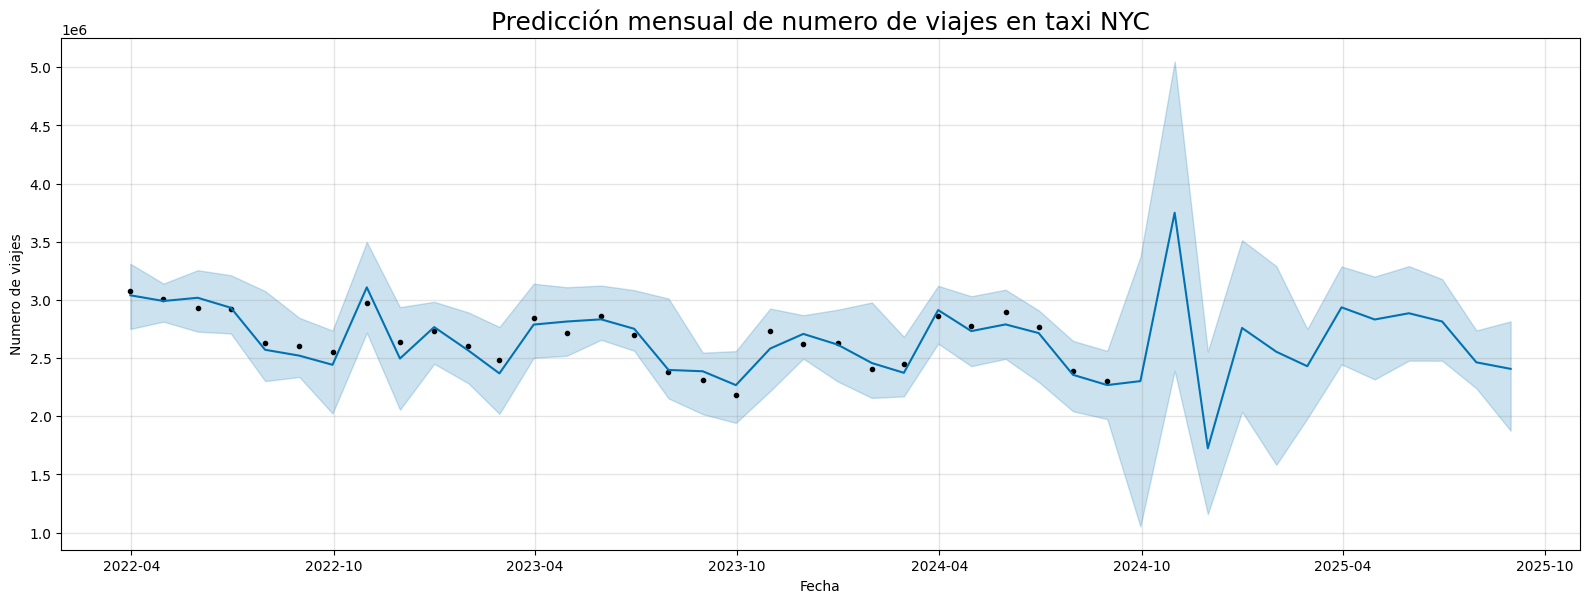

In [40]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

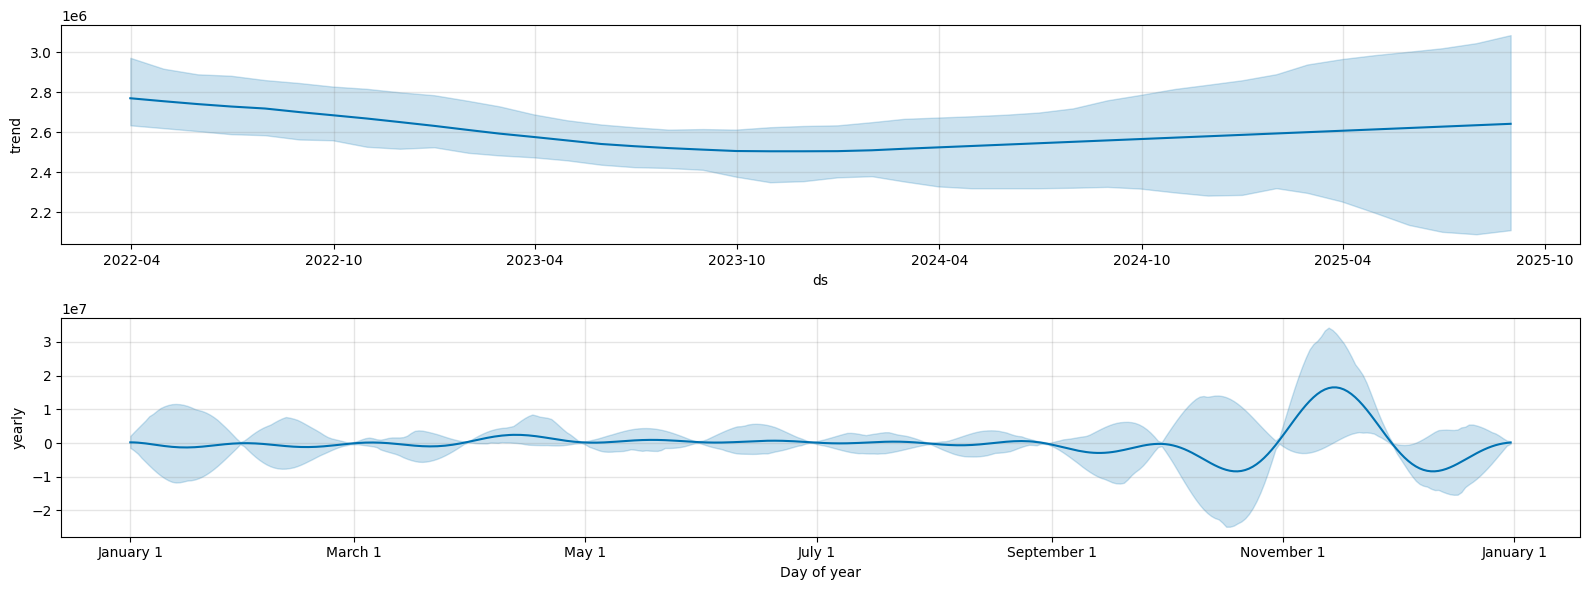

In [41]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [42]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [43]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/fzh7uz97.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplnvzjdhf/qg07cyly.json
23:24:49 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91416', 'data', 'file=/tmp/tmplnvzjdhf/fzh7uz97.json', 'init=/tmp/tmplnvzjdhf/qg07cyly.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelw8idxzzq/prophet_model-20241118232449_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=91416', 'data', 'file=/tmp/tmplnvzjdhf/fzh7uz97.json', 'init=/tmp/tmplnvzjdhf/qg07cyly.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelw8idxzzq/prophet_model-20241118232449_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

23:24:50 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=91416', 'data', 'file=/tmp/tmplnvzjdhf/fzh7uz97.json', 'init=/tmp/tmplnvzjdhf/qg07cyly.json', 'output', 'file=/tmp/tmplnvzjdhf/prophet_modelw8idxzzq/prophet_model-20241118232449_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmplnvzjdhf/prophet_modelw8idxzzq/prophet_model-20241118232449_1.csv
 console_msgs (if any):
	/tmp/tmplnvzjdhf/prophet_modelw8idxzzq/prophet_model-20241118232449_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [44]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,8.947792e+05,-9.065902e+05,2.365716e+06,2179200,2023-09-01
1,2023-10-31,1.165694e+06,-1.349190e+06,2.878906e+06,2736389,2023-09-01
2,2023-11-30,3.959873e+06,2.930138e+06,5.517961e+06,2616757,2023-09-01
3,2023-12-31,2.958905e+06,1.376328e+06,4.673044e+06,2625768,2023-09-01
4,2024-01-31,1.669429e+06,2.884229e+05,4.336585e+06,2409342,2023-09-01
5,2024-02-29,5.464283e+06,1.830516e+06,8.369533e+06,2448952,2023-09-01
6,2024-03-31,3.235660e+05,-2.863969e+06,3.620470e+06,2858661,2023-09-01
7,2024-04-30,1.837183e+06,-5.289680e+05,3.943840e+06,2777362,2023-09-01
8,2024-05-31,1.840055e+06,-1.340328e+06,4.011380e+06,2899539,2023-09-01
9,2024-06-30,8.024955e+05,-1.002505e+06,3.250851e+06,2767032,2023-09-01


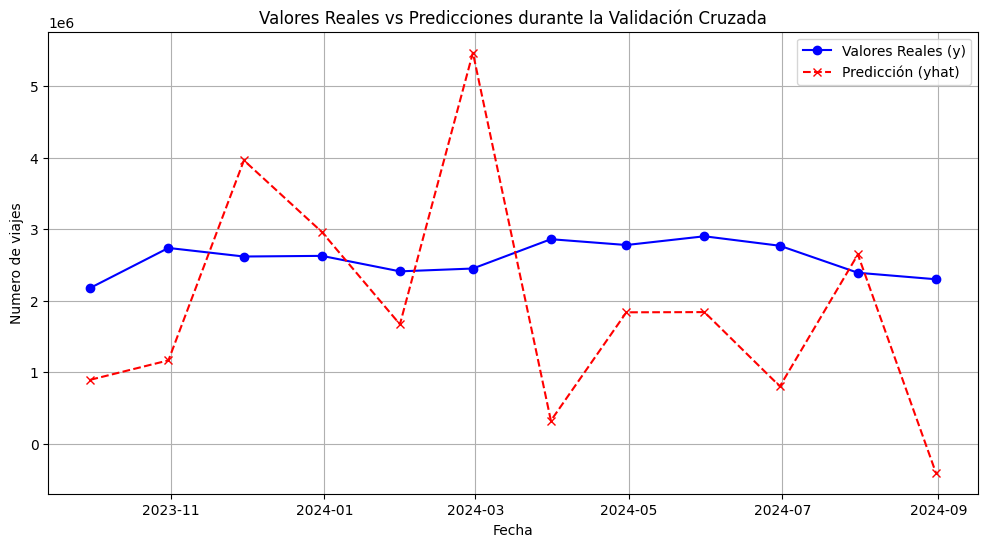

In [45]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
df_p_1 = performance_metrics(df_cv_1)
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,1.200000e+01,1.200000e+01,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,2.944731e+12,1.478716e+06,1.478716e+06,0.577113,0.577113,0.745286,0.916667
std,109 days 20:33:46.987269072,3.054484e+12,9.094234e+05,9.094234e+05,0.369604,0.369604,0.580040,0.288675
min,29 days 00:00:00,6.525085e+10,2.554425e+05,2.554425e+05,0.106891,0.106891,0.101468,0.000000
25%,113 days 06:00:00,7.998205e+11,8.901127e+05,8.901127e+05,0.330662,0.330662,0.396317,1.000000
50%,196 days 12:00:00,1.726849e+12,1.313769e+06,1.313769e+06,0.543639,0.543639,0.604588,1.000000
75%,280 days 12:00:00,4.501229e+12,2.107176e+06,2.107176e+06,0.754188,0.754188,0.901936,1.000000
max,365 days 00:00:00,9.092222e+12,3.015331e+06,3.015331e+06,1.231274,1.231274,2.000000,1.000000


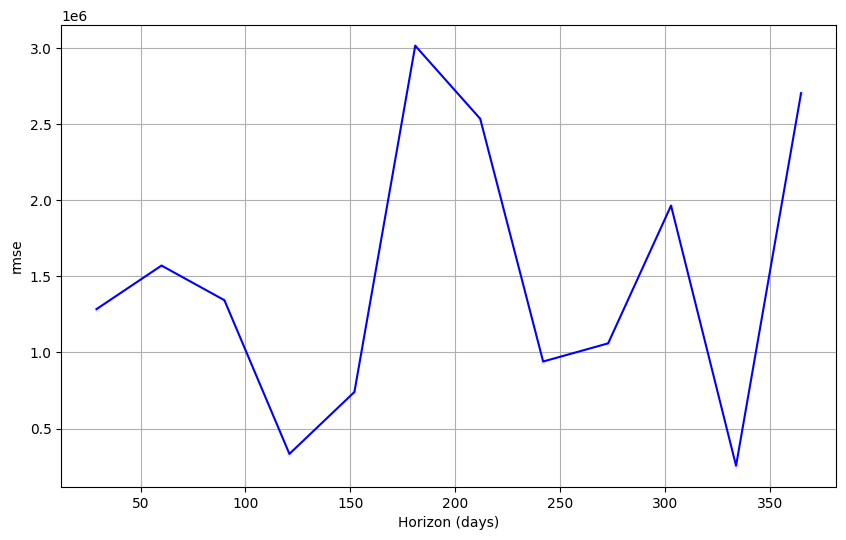

In [47]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [48]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 1478716.0176125767


In [49]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 1478716.0176125767


In [50]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [51]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.577112870793115


In [52]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,2.944731e+12,1.716022e+06,1.478716e+06,0.577113,0.543639,0.745286,0.916667


In [53]:
forecast_1.to_csv('forecast_mensual.csv')